**Introduction to Machine Learning**  
**Duke University |ECE 580 – Spring 2025**  
**HW #1 –Solution**

**Date:** February 4, 2025

# Data Preparation and Exploration

## Question 1(a)  

 Load cleaned version of the train set, available as cleaned_automobile_train_data.pt,
using the function load_dataset(filepath). A demo is provided in
HW1_Data_loading_function_and_usage.ipynb. (If you prefer to not use a notebook,
simply copy the content into a .py file. For the entirety of this question, only use the train set, do
not use the test set

**Answer:**

In [1]:
import torch
import random
random.seed(2000)
import numpy as np
import pandas as pd
import torch
import requests
import warnings
warnings.filterwarnings("ignore")

# === Step 1: Loading the Dataset === #
def load_dataset(file_path):
    """
    Loads the saved PyTorch .pt dataset from the specified file path.

    This function reads a dataset saved in PyTorch format and extracts its features, target values, 
    and relevant metadata. It prints the shapes of the feature matrix and target vector, 
    as well as the feature and target names.

    Parameters:
    -----------
    file_path : str
        The file path to the saved .pt dataset.

    Returns:
    --------
    tuple
        A tuple containing:
        - features (torch.Tensor): A tensor containing the feature values.
        - target (torch.Tensor): A tensor containing the target values.
        - feature_names (list of str): A list of names corresponding to the feature columns.
        - target_name (str): The name of the target variable.
    
    Example:
    --------
    >>> features, target, feature_names, target_name = load_dataset("cleaned_automobile_data.pt")
    Loaded dataset successfully!
    Features shape: torch.Size([100, 13]), Target shape: torch.Size([100])
    Feature Names: ['wheel-base', 'length', 'width', ...], Target Name: 'price'
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]


    
    
#-| Step-3: Convert tensors to DataFrame
def make_dataframe_from_tensors(features, target, feature_names, target_name):
    """
    Convert PyTorch tensors for features and target into a Pandas DataFrame.
    """
    # Convert tensors to numpy arrays for DataFrame conversion
    features_np = features.numpy()
    target_np   = target.numpy().flatten()  # Flatten target to 1D array for DataFrame

    # Create a DataFrame with feature columns and target
    df = pd.DataFrame(features_np, columns=feature_names)
    df[target_name] = target_np  # Add target column

    return df


if __name__ == "__main__":

    # Step 1: Load the dataset and display information
    features, target, feature_names, target_name = load_dataset("cleaned_automobile_train_dataset.pt")
    print(f"First 5 rows of features:\n{features[:2]}")
    print(f"First 5 rows of target:\n{target[:2]}")
    
    # Step 2: Create a DataFrame from the loaded dataset
    df = make_dataframe_from_tensors(features, target, feature_names, target_name)
    print("\nFirst 5 rows of the dataset as a DataFrame:")
    print(df.head())
    

Loaded dataset successfully!
Features shape: torch.Size([156, 13]), Target shape: torch.Size([156, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
First 5 rows of features:
tensor([[9.9800e+01, 1.7730e+02, 6.6300e+01, 5.3100e+01, 2.5070e+03, 1.3600e+02,
         3.1900e+00, 3.4000e+00, 8.5000e+00, 1.1000e+02, 5.5000e+03, 1.9000e+01,
         2.5000e+01],
        [9.7000e+01, 1.7200e+02, 6.5400e+01, 5.4300e+01, 2.5100e+03, 1.0800e+02,
         3.6200e+00, 2.6400e+00, 7.7000e+00, 1.1100e+02, 4.8000e+03, 2.4000e+01,
         2.9000e+01]])
First 5 rows of target:
tensor([[15250.],
        [11259.]])

First 5 rows of the dataset as a DataFrame:
   wheel-base      length      width     height  curb-weight  engine-size  \
0   99.800003  177.300003  66.300003  53.099998       2507.0        136.0   
1   97.000000  172.000000  65.400002  54.

## Question 1(b)

In a future assignment, you will explore systematic feature (predictor variable) selection. For (b)
now, you are going to select features you believe are most promising via data exploration.
For each of the 13 continuous predictor variables (features), plot the target variable (price) as a
function of the predictor variable (feature) using a scatter plot. This will produce 13 scatter plots,
one for each feature

**Answer:**

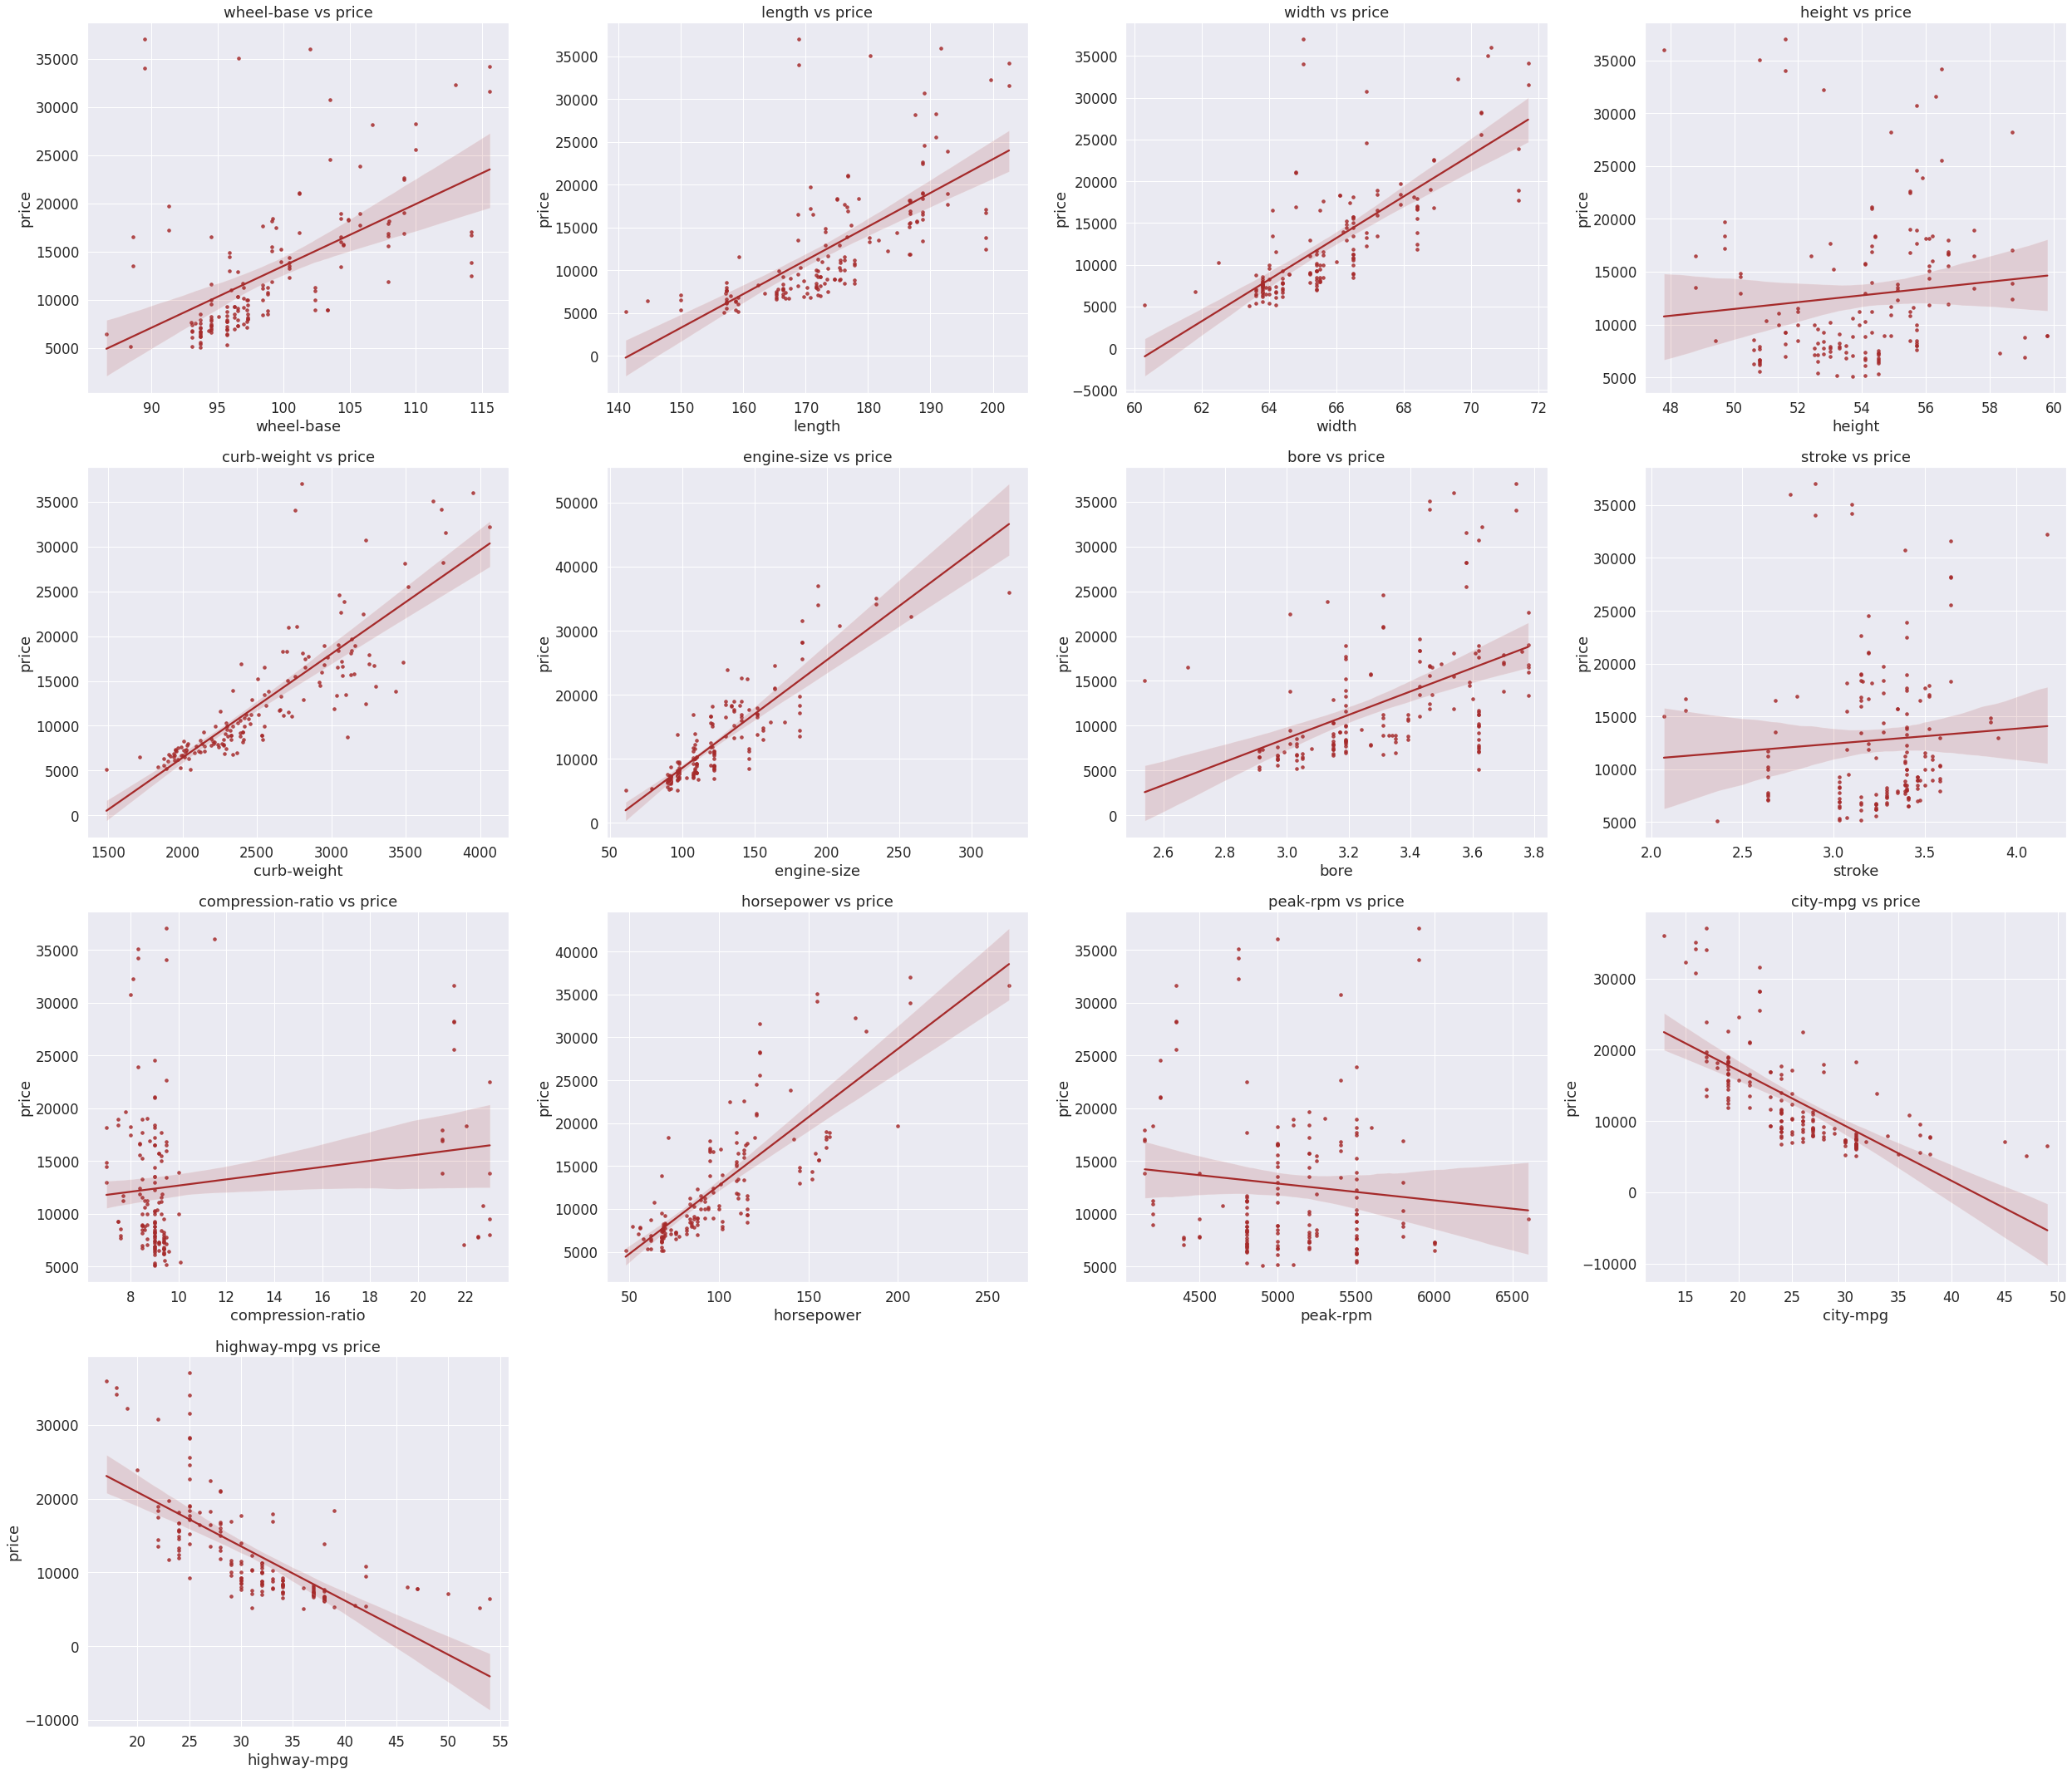

In [2]:
#-- Function
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_PV_vs_Target_plots_from_df(roi_df,target_variable_name,number_of_colums,fig_size,fig_save_name='fig.png',save_fig=False):
    """
    inputs: a) roi_df = dataframe ; dtype:
    dataframe object)
    b) target_variable_name = Name of the target column; dtype:
    string
    c) number_of_colums = Number of columns you want in a subplot; d
    type: int
    4) fig_size = Define the size of the figure; d
    type: (int,int)
    5)fig_save_name = if saving the figute provide name; d
    type: string
    6)save_fig = save fig or no; d
    type: bool
    """
    # getting column/predictive variable names from the df
    name_of_predictive_variable = roi_df.columns.values.tolist()
    # removing the target variable name from the column list
    name_of_predictive_variable.remove(target_variable_name)
    #Computing the Sub-plot size
    number_of_predictive_variables = len(name_of_predictive_variable)
    subplot_number_of_colums = number_of_colums
    subplot_number_of_rows = math.ceil(number_of_predictive_variables/subplot_number_of_colums)
    sns.set(font_scale=1.5)
    # Subplot
    fig = plt.figure(figsize=fig_size)
    # loop through each of the subplot location and plot predictive Vs target variable
    for subplot_count in range(0,number_of_predictive_variables):
        ax = fig.add_subplot(subplot_number_of_rows, subplot_number_of_colums, subplot_count+1)
        sns.regplot(x=name_of_predictive_variable[subplot_count], y=target_variable_name, data=roi_df, color='brown', marker='.', scatter_kws={'s': 50},ax=ax)
        ax.set_title('{} vs price'.format(name_of_predictive_variable[subplot_count]))
    plt.tight_layout()
    #-if saving the figure
    if save_fig:
        plt.savefig(fig_save_name,bbox_inches="tight",dpi=300)
        files.download(fig_save_name)
        plt.show()
    return


plot_PV_vs_Target_plots_from_df(roi_df=df,target_variable_name='price',number_of_colums=4,fig_size=(35,30),fig_save_name='Automobile_dataset_13predictiveFeatures_Vs_price.png',save_fig=False)



## Question 1 (c) 

Provide a brief summary (2 sentences) of overall trends from the scatter plots, highlighting (c) promising and unpromising features. You may notice that for some features there appears to be a nonlinear relationship between the feature and the car’s price. For example, price = feature2 ,or price = 1/feature. Keep this in mind when you propose candidate models for predicting a car’s
price.

**Answer:** Engine-size, curb-weight, horsepower, and width show strong positive correlations with price, while city-mpg and highway-mpg have negative correlations; height, stroke, and peak-rpm show little to no relation.



## Question 1(d) 

When performing regression, it is preferable to have features that are as independent as pos- (d)
sible, as strongly related (correlated) features do not provide much additional information and
may lead to computational challenges. For example, if there were two additional continuous
features, “km per gallon city” and “km per gallon highway”, these features would be highly (perfectly?) correlated with the existing features “city-mpg” and “highway-mpg,” respectively, because 1 km = 0.6241 miles. For this reason, we would want to include only one of “km per gallon city” and “city-mpg” in our model, and only one of “km per gallon highway” and “highway-mpg” in our model.

Plot each pair-wise combination of features using scatter plots to aid in (visually) identifying
features that are related (correlated).
This type of visualization is often referred to as a “scatterplot matrix” or “pairwise scatterplots.”
(Examples of this type of visualization are available in Figure 3.6 in Introduction to Statistical
Learning and Figure 1.1 in Elements of Statistical Learning.) There will be a lot of subplots. Write
code (or leverage a package) to do the repetitive heavy lifting for you! Since you are using these
subplots to identify correlation trends the subplots do not need to be high-resolution; it is ok if
the subplots are “small”

**Answer:**

<Figure size 2160x2160 with 0 Axes>

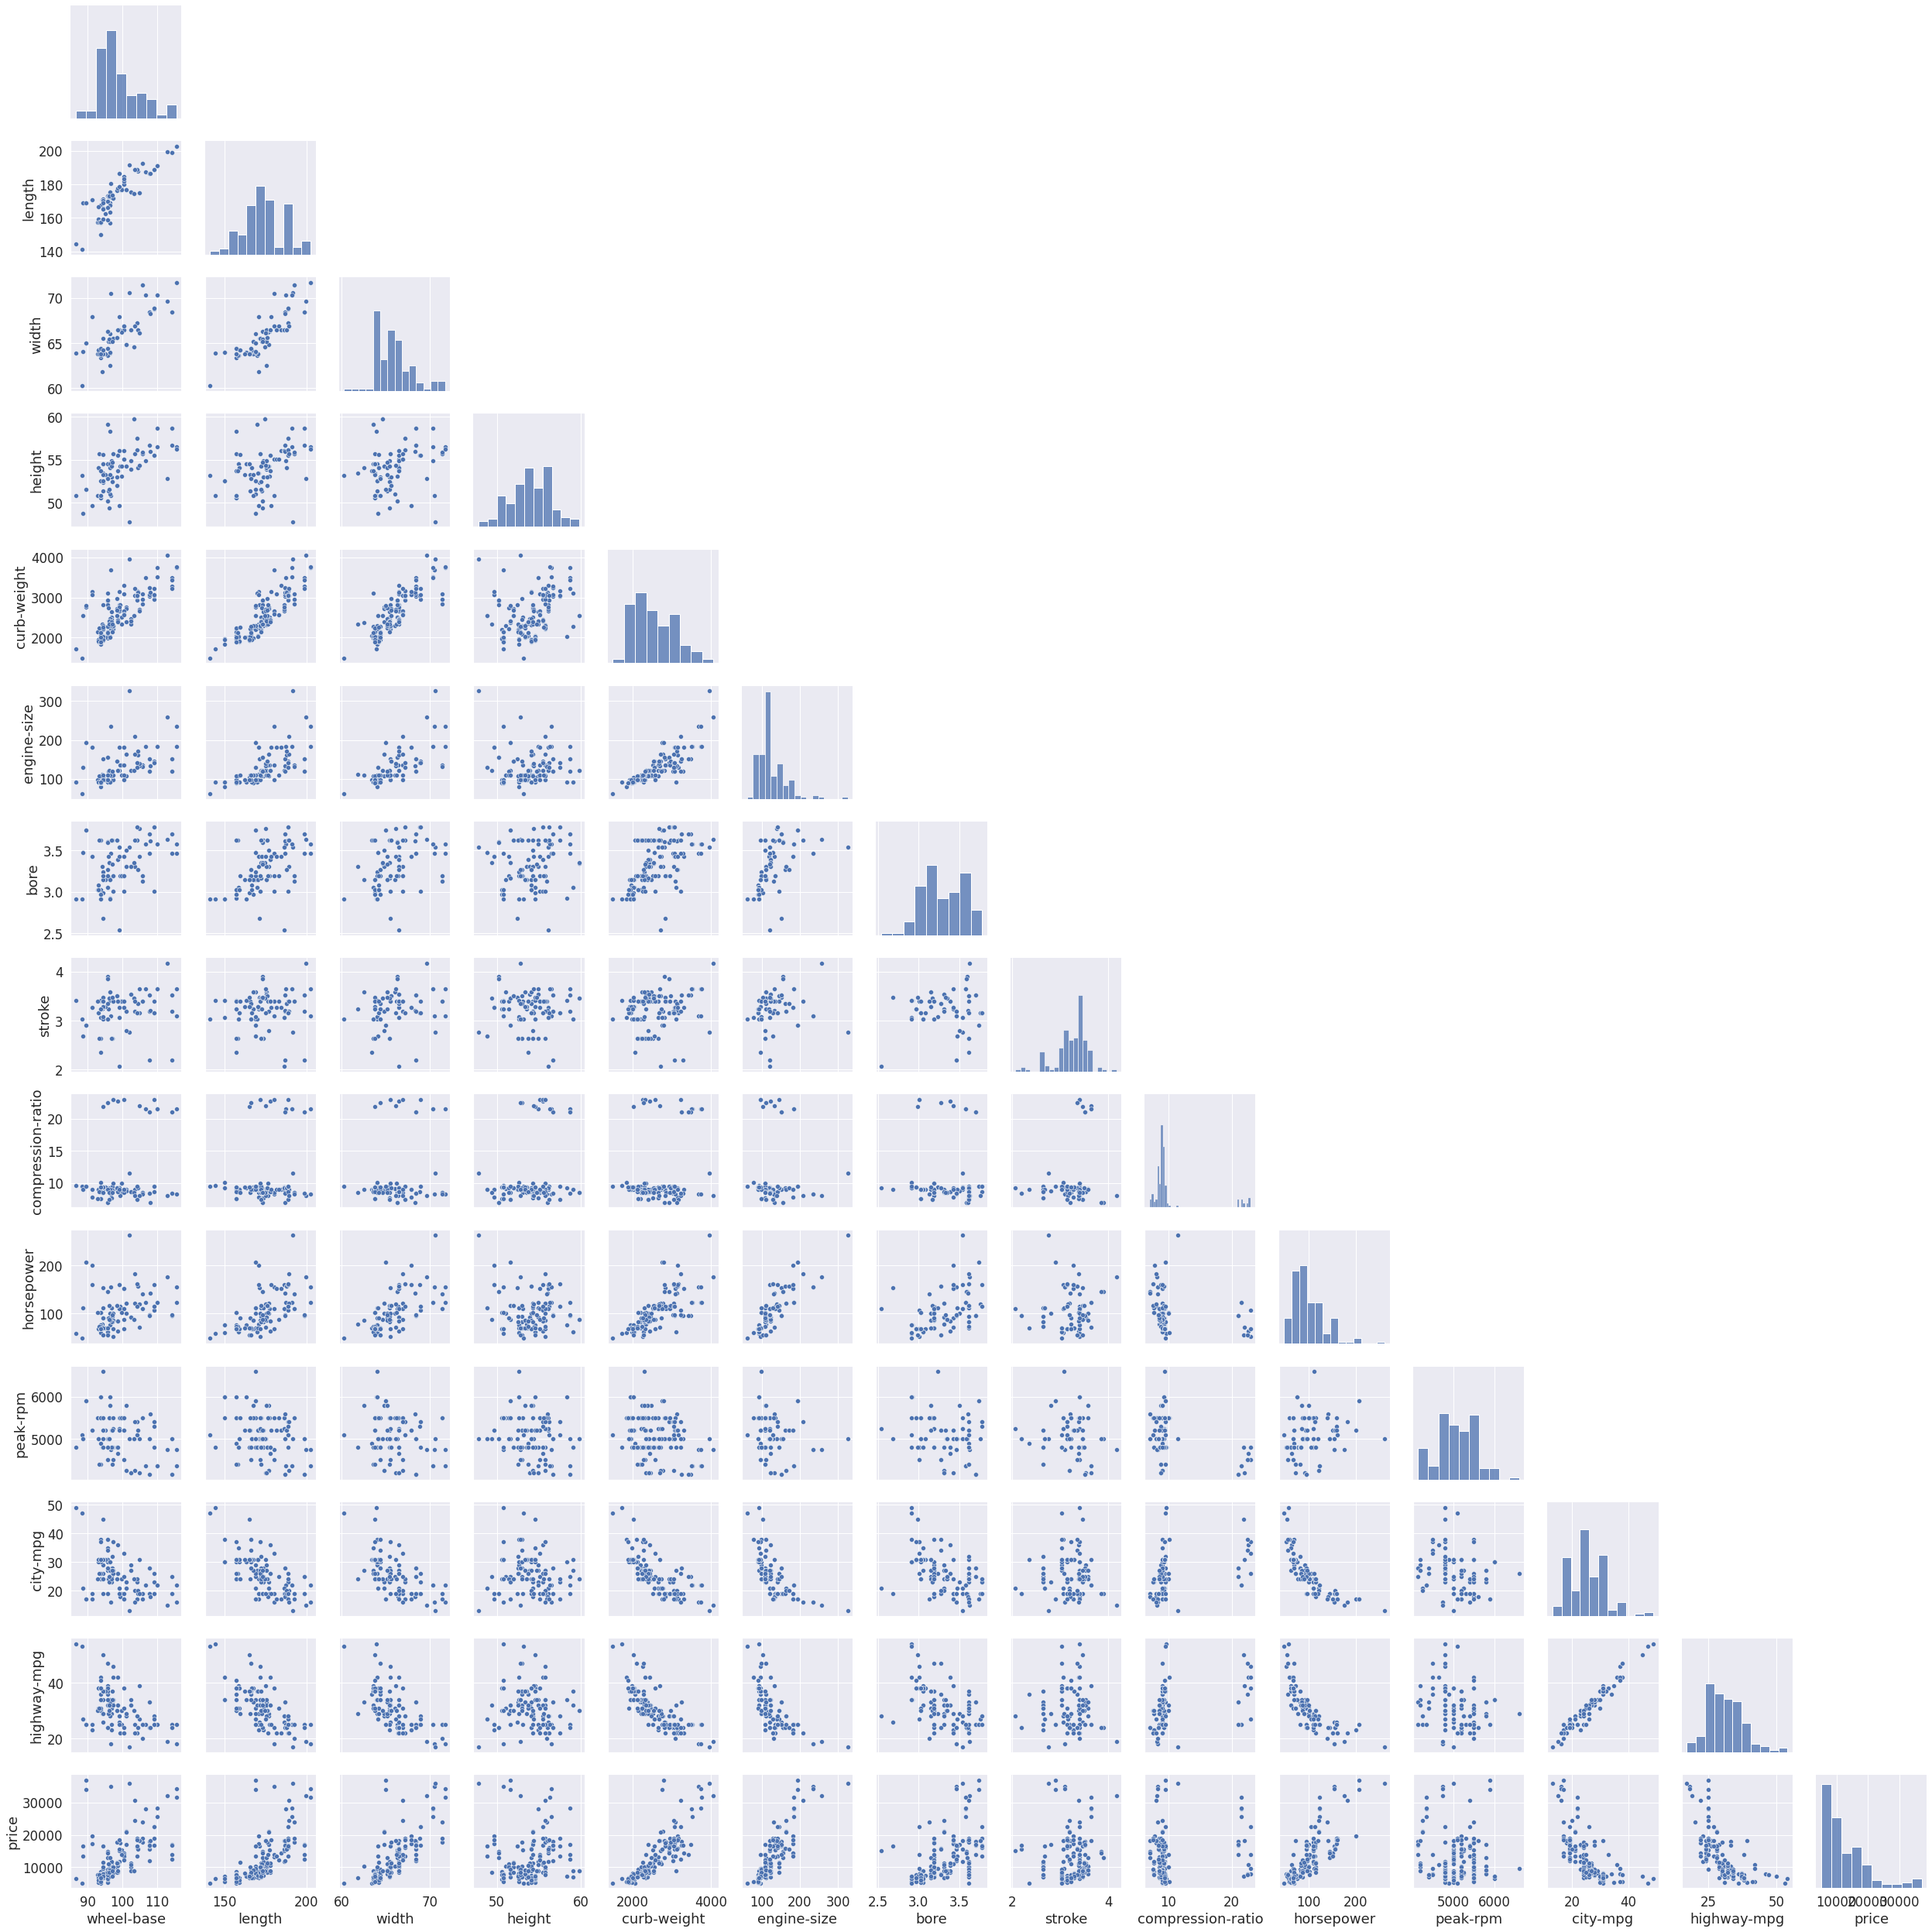

In [3]:
# for this task we will be using a function "seaborn.pairplot" from seaborn python libarary (ref:https://seaborn.pydata.org/generated/seaborn.pairplot.html)
fig = plt.figure(figsize=(30,30)) #defining figure sive
sns.pairplot(df,corner=True) #ploting
plt.tight_layout()
plt.show()

## Question 1(e)

Summarize key correlated features in 2-3 sentences and list the features that you recommend (e)
excluding.

**Answer:** Engine-size, curb-weight, horsepower, and width strongly correlate with price, while city-mpg and highway-mpg show negative correlations. Height, stroke, compression-ratio, and peak-rpm have weak correlations and can be excluded.

# Ordinary Least Squares

## Question 2(a)

In [4]:
#-|Step-1 Required python libraries
import random
SEED = 2000
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from math import comb         # For calculating number of combinations
from itertools import combinations_with_replacement, product
random.seed(SEED)             # Python random seed
np.random.seed(SEED)          # NumPy random seed
torch.manual_seed(SEED)       # PyTorch random seed
torch.cuda.manual_seed(SEED)  # PyTorch seed for GPU (if using CUDA)
torch.backends.cudnn.deterministic = True   # Make CUDA deterministic
torch.backends.cudnn.benchmark     = False  # Disable autotuning for reproducibility

##-Data loading function
def load_dataset(file_path):
    """
    Load the saved PyTorch .pt dataset from the given file path.
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]


#-|Step-1: Dataset Loading and Train test split,
train_file_path                               = "cleaned_automobile_train_dataset.pt"  # Change to your local file path
X_train, y_train, feature_names, y_train_name = load_dataset(train_file_path)
#Convert data to torch tensors
X_train                                       = torch.tensor(X_train, dtype=torch.float32)
y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

#-|Step-2: Dataset Loading and test test split,
test_file_path                             = "cleaned_automobile_test_dataset.pt"  # Change to your local file path
X_test, y_test, feature_names, y_test_name = load_dataset(test_file_path)
#Convert data to torch tensors
X_test                                       = torch.tensor(X_test, dtype=torch.float32)
y_test                                       = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


#OLS SOLUTION HERE
def make_quad_feat(X):
    feats=[]
    feats.append(torch.ones((X.shape[0],1)))
    for i in range(X.shape[1]):
        feats.append((X[:,i])[:,None])
        for j in range(i,X.shape[1]):
            feats.append((X[:,i]*X[:,j])[:,None])
    return torch.cat(feats, dim=1)

X_train_poly = make_quad_feat(X_train)
X_test_poly  = make_quad_feat(X_test)
print(X_train_poly.shape)







Loaded dataset successfully!
Features shape: torch.Size([156, 13]), Target shape: torch.Size([156, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
Loaded dataset successfully!
Features shape: torch.Size([39, 13]), Target shape: torch.Size([39, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
torch.Size([156, 105])


## Question 2(b)

In [5]:
XTX = torch.einsum('ki,kj->ij',(X_train_poly,X_train_poly))
XTY = torch.einsum('ki,k->i',(X_train_poly,y_train[:,0]))
OLS_W = torch.linalg.solve(XTX+1e-10*XTX.norm()*torch.eye(XTX.shape[0]), XTY)

## Question 2(c)

For the parameters you found, and for (c) train set and test set separately, print the MSE error and
R^2 score. Report your numbers in a 2x2 table. The value test set MSE - train set MSE is sometimes called the generalization gap. Report this
value as well

**Answer:**  The  model achieves a **train R² of 0.89** and a **test R² of 0.86**, indicating strong predictive performance.  The **train MSE is 0.11**, while the **test MSE is 0.14**, resulting in a **generalization gap of 0.03**.  
This small gap suggests good generalization with minimal overfitting.  

| Dataset  | R² Score | MSE  |  
|----------|---------|------|  
| **Train** | **0.89**  | **0.11** |  
| **Test**  | **0.86**  | **0.14** |  

**Generalization Gap (Test MSE - Train MSE):** **0.03**


In [6]:
OLS_Y_pred = torch.einsum('ki,i->k',(X_train_poly,OLS_W))[:,None]
with torch.no_grad():
    ss_res = ((y_train- OLS_Y_pred) ** 2).sum().item()         # Residual sum of squares
    ss_tot = ((y_train - y_train.mean()) ** 2).sum().item()  # Total sum of squares
    r2_naive = 1 - (ss_res / ss_tot)
    print(f"Poly model train R^2: {r2_naive:.2f}")
    # Calculate Mean Squared Error (MSE)
    mse_naive = 1-r2_naive # Mean of squared differences
    print(f"Poly model train MSE: {mse_naive:.2f}")

OLS_Y_pred = torch.einsum('ki,i->k',(X_test_poly,OLS_W))[:,None]
with torch.no_grad():
    ss_res = ((y_test- OLS_Y_pred) ** 2).sum().item()         # Residual sum of squares
    ss_tot = ((y_test - y_test.mean()) ** 2).sum().item()     # Total sum of squares
    r2_naive = 1 - (ss_res / ss_tot)
    print(f"Poly model test R^2: {r2_naive:.2f}")
    # Calculate Mean Squared Error (MSE)
    mse_naive = 1-r2_naive # Mean of squared differences
    print(f"Poly model test MSE: {mse_naive:.2f}")

Poly model train R^2: 0.89
Poly model train MSE: 0.11
Poly model test R^2: 0.86
Poly model test MSE: 0.14


## Question 2(d)

Scatter plot the predicted price (on the vertical axis) as a function of the true price (on the horizon- (d)
tal axis). Also plot the line price ˆ = price (the line representing perfect prediction) as a reference.
This visualization aids in identification of trends in the estimation errors as a function of the target
variable (true price).Provide a short 1-sentence impression of the performance – what points had the largest deviation?


**Answer:** Higher-priced cars show the largest prediction errors, deviating more from the ideal line.

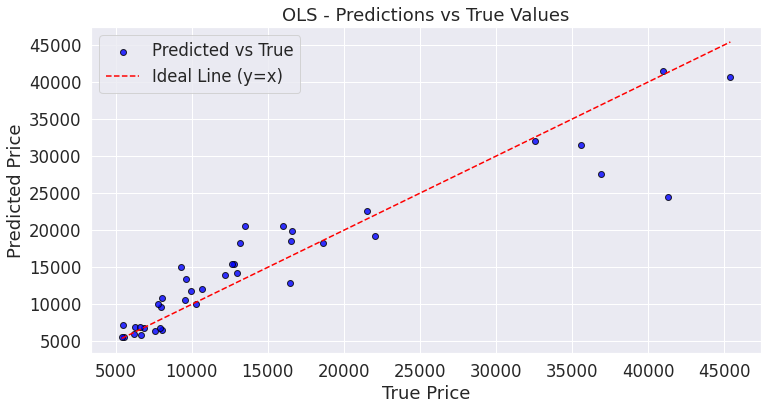

In [7]:
import matplotlib.pyplot as plt

# Convert tensors to numpy for plotting
y_test_np = y_test.cpu().numpy().flatten()
y_pred_np = OLS_Y_pred.cpu().numpy().flatten()

# Plot the true vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.8, color='blue',edgecolors='black',label='Predicted vs True')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'OLS - Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Now simply take φ(x) = x, i.e. no feature transformation.

## Question 3(a)

Find the OLS solution using the untransformed 13 features, again using just the (a) training set. Tip
2 from 2(b) may be helpful here as well. 

**Answer:**

In [8]:
#-|Step-1 Required python libraries
import random
SEED = 2000
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from math import comb         # For calculating number of combinations
from itertools import combinations_with_replacement, product
random.seed(SEED)             # Python random seed
np.random.seed(SEED)          # NumPy random seed
torch.manual_seed(SEED)       # PyTorch random seed
torch.cuda.manual_seed(SEED)  # PyTorch seed for GPU (if using CUDA)
torch.backends.cudnn.deterministic = True   # Make CUDA deterministic
torch.backends.cudnn.benchmark     = False  # Disable autotuning for reproducibility

##-Data loading function
def load_dataset(file_path):
    """
    Load the saved PyTorch .pt dataset from the given file path.
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]


#-|Step-1: Dataset Loading and Train test split,
train_file_path                               = "cleaned_automobile_train_dataset.pt"  # Change to your local file path
X_train, y_train, feature_names, y_train_name = load_dataset(train_file_path)
#Convert data to torch tensors
X_train                                       = torch.tensor(X_train, dtype=torch.float32)
y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

#-|Step-2: Dataset Loading and test test split,
test_file_path                             = "cleaned_automobile_test_dataset.pt"  # Change to your local file path
X_test, y_test, feature_names, y_test_name = load_dataset(test_file_path)
#Convert data to torch tensors
X_test                                       = torch.tensor(X_test, dtype=torch.float32)
y_test                                       = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


XTX = torch.einsum('ki,kj->ij',(X_train,X_train))
XTY = torch.einsum('ki,k->i',(X_train,y_train[:,0]))
OLS_W = torch.linalg.solve(XTX+1e-10*XTX.norm()*torch.eye(XTX.shape[0]), XTY)







Loaded dataset successfully!
Features shape: torch.Size([156, 13]), Target shape: torch.Size([156, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
Loaded dataset successfully!
Features shape: torch.Size([39, 13]), Target shape: torch.Size([39, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price


## Question 3(b) 

For the parameters you found, and for (b) train set and test set separately, print the MSE error and R² score. Report your numbers in a 2x2 table. Again, compute and report the generalization gap: test set MSE - train set MSE


**Answer:**

The OLS model achieves a **train R² of 0.83** and a **test R² of 0.83**, indicating consistent performance on both datasets.  
The **train MSE is 0.17**, while the **test MSE is 0.17**, resulting in a **generalization gap of 0.00**.  
This suggests excellent generalization with no overfitting.

| Dataset  | R² Score | MSE  |  
|----------|---------|------|  
| **Train** | **0.83**  | **0.17** |  
| **Test**  | **0.83**  | **0.17** |  

**Generalization Gap (Test MSE - Train MSE):** **0.00**


model train R^2: 0.83
model train MSE: 0.17
model test R^2: 0.83
model test MSE: 0.17


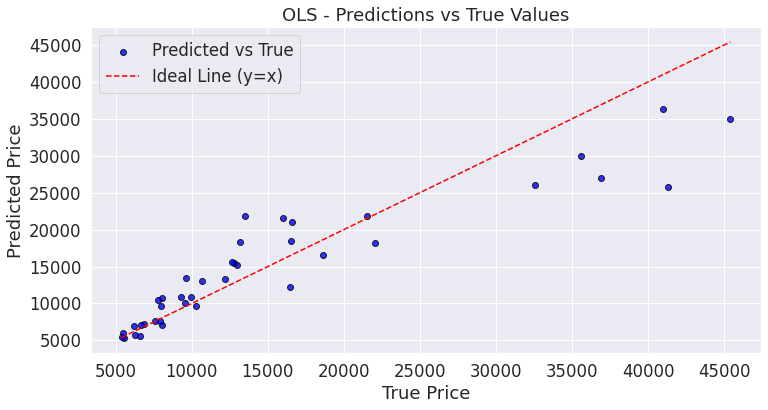

In [9]:
OLS_Y_pred = torch.einsum('ki,i->k',(X_train,OLS_W))[:,None]
with torch.no_grad():
    ss_res = ((y_train- OLS_Y_pred) ** 2).sum().item()         # Residual sum of squares
    ss_tot = ((y_train - y_train.mean()) ** 2).sum().item()  # Total sum of squares
    r2_naive = 1 - (ss_res / ss_tot)
    print(f"model train R^2: {r2_naive:.2f}")
    # Calculate Mean Squared Error (MSE)
    mse_naive = 1-r2_naive # Mean of squared differences
    print(f"model train MSE: {mse_naive:.2f}")

OLS_Y_pred = torch.einsum('ki,i->k',(X_test,OLS_W))[:,None]
with torch.no_grad():
    ss_res = ((y_test- OLS_Y_pred) ** 2).sum().item()         # Residual sum of squares
    ss_tot = ((y_test - y_test.mean()) ** 2).sum().item()     # Total sum of squares
    r2_naive = 1 - (ss_res / ss_tot)
    print(f"model test R^2: {r2_naive:.2f}")
    # Calculate Mean Squared Error (MSE)
    mse_naive = 1-r2_naive # Mean of squared differences
    print(f"model test MSE: {mse_naive:.2f}")


import matplotlib.pyplot as plt

# Convert tensors to numpy for plotting
y_test_np = y_test.cpu().numpy().flatten()
y_pred_np = OLS_Y_pred.cpu().numpy().flatten()

# Plot the true vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.8, color='blue',edgecolors='black',label='Predicted vs True')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'OLS - Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()

## Question 3(c) 

Model 2(c) is better for minimizing R² error (0.89 train, 0.86 test), while 3(b) is preferred for minimizing the generalization gap (0.00 vs. 0.03), indicating better generalization with less overfitting.

**Answer:** Model 2(c) is better for minimizing R² error (0.89 train, 0.86 test), while 3(b) is preferred for minimizing the generalization gap (0.00 vs. 0.03), indicating better generalization with less overfitting.